In [109]:
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib as mpl
import seaborn as sns



# Prepare Datasets

#### Import Price and Volume data from csv

In [4]:
# ดึงข้อมูลราคาและvolumeของเหรียญ จากตลาด Bitkub ที่เตรียมไว้
df_bitkub_eth = pd.read_csv('./eth_ohclv_bitkub.csv')
df_bitkub_btc = pd.read_csv('./btc_ohclv_bitkub.csv')
df_bitkub_kub = pd.read_csv('./kub_ohclv_bitkub.csv')

In [5]:
# ดึงข้อมูลราคาและvolumeของเหรียญ จากตลาด binance ที่เตรียมไว้
df_binance_eth = pd.read_csv('./eth_ohclv_binance.csv')
df_binance_btc = pd.read_csv('./btc_ohclv_binance.csv')
df_binance_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  1884 non-null   object 
 1   symbol    1884 non-null   object 
 2   open      1884 non-null   float64
 3   high      1884 non-null   float64
 4   low       1884 non-null   float64
 5   close     1884 non-null   float64
 6   volume    1884 non-null   float64
dtypes: float64(5), object(2)
memory usage: 103.2+ KB


In [6]:
df_binance_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  1884 non-null   object 
 1   symbol    1884 non-null   object 
 2   open      1884 non-null   float64
 3   high      1884 non-null   float64
 4   low       1884 non-null   float64
 5   close     1884 non-null   float64
 6   volume    1884 non-null   float64
dtypes: float64(5), object(2)
memory usage: 103.2+ KB


In [7]:
# เช็คจำนวนของข้อมูลที่ได้มี ว่ามีวันที่เท่าไหร่ถึงวันที่เท่าไหร่บ้าง
print('----- Bitkub data ------')
print('BTC start date :',df_bitkub_btc['datetime'].iloc[0])
print('BTC end date :',df_bitkub_btc['datetime'].iloc[-1])
print('\n')
print('ETH start date :', df_bitkub_eth['datetime'].iloc[0])
print('ETH end date :', df_bitkub_eth['datetime'].iloc[-1])
print('\n')

print('KUB start date', df_bitkub_kub['datetime'].iloc[0])
print('KUB end date', df_bitkub_kub['datetime'].iloc[-1])

print('\n----- Binance data ------')
print('BTC start date', df_binance_btc['datetime'].iloc[0])
print('BTC end date', df_binance_btc['datetime'].iloc[0])

print('\nETH start date', df_binance_eth['datetime'].iloc[0])
print('ETH end date', df_binance_eth['datetime'].iloc[0])


----- Bitkub data ------
BTC start date : 2018-05-09
BTC end date : 2022-10-12


ETH start date : 2018-05-09
ETH end date : 2022-10-12


KUB start date 2021-05-20
KUB end date 2022-10-12

----- Binance data ------
BTC start date 2017-08-17 07:00:00
BTC end date 2017-08-17 07:00:00

ETH start date 2017-08-17 07:00:00
ETH end date 2017-08-17 07:00:00


##### Check na

In [8]:
print('Bitkub na \n')
print('Sum of NA row :',df_bitkub_btc.isna().sum())
print('\nSum of NA row :',df_bitkub_eth.isna().sum())
print('\nSum of NA row :',df_bitkub_kub.isna().sum())

print('\nBiannce na')
print('Sum of NA row :', df_binance_btc.isna().sum())
print('Sum of NA row :', df_binance_eth.isna().sum())


Bitkub na 

Sum of NA row : datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

Sum of NA row : datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

Sum of NA row : datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

Biannce na
Sum of NA row : datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64
Sum of NA row : datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64


In [9]:
# ข้อมูลที่สนใจในแต่ละเหรียญคือ Volume เพื่อที่จะนำมาดูว่าในวันที่มีการค้นหาว่า Bitkub ใน google นั้น จะทำให้ยอดการซื้อขายใน ฺBitkub สูงขึ้นไหม
df_bitkub_btc

,datetime,symbol,open,high,low,close,volume
0,2018-05-09,BITKUB:BTCTHB,293000.00,300000.00,287000.00,295950.00,2.132158
1,2018-05-10,BITKUB:BTCTHB,295950.00,299000.00,289351.00,299000.00,0.536473
2,2018-05-11,BITKUB:BTCTHB,294005.00,296000.00,270150.00,270150.00,1.889688
3,2018-05-12,BITKUB:BTCTHB,270151.00,288253.00,270150.00,280000.00,0.231786
4,2018-05-13,BITKUB:BTCTHB,280000.00,288252.00,277000.00,277200.00,1.817175
...,...,...,...,...,...,...,...
1613,2022-10-08,BITKUB:BTCTHB,730604.94,738045.00,727605.00,731418.74,69.469531
1614,2022-10-09,BITKUB:BTCTHB,731854.38,732850.00,723045.01,730728.57,68.305813
1615,2022-10-10,BITKUB:BTCTHB,731494.93,732999.99,724000.00,725100.00,88.753887
1616,2022-10-11,BITKUB:BTCTHB,725999.84,731999.99,717194.00,726539.99,89.960297


#### Import google trend data from csv

In [11]:
# ดึงข้อมูลจากไฟล์ .csv ที่เตรียมไว้ ซึ่งได้มาจากการใช้ library pytrends ในการfetchข้อมูลมา
df = pd.read_csv('./bitkub_trend.csv')

In [12]:
df = df.set_index('date')

In [13]:
df.info()

# column name 'bitkub', scaled

<class 'pandas.core.frame.DataFrame'>
Index: 643 entries, 2020-12-01 to 2022-09-04
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bitkub_unscaled  643 non-null    int64  
 1   bitkub_monthly   638 non-null    float64
 2   isPartial        92 non-null     object 
 3   scale            638 non-null    float64
 4   bitkub           638 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 30.1+ KB


In [14]:
df.describe()

,bitkub_unscaled,bitkub_monthly,scale,bitkub
count,643.000000,638.000000,638.000000,638.000000
mean,12.220840,15.503135,0.155031,2.054577
std,27.303722,23.537454,0.235375,8.119798
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,30.000000,0.300000,0.000000
max,100.000000,100.000000,1.000000,60.000000


In [15]:
df

,bitkub_unscaled,bitkub_monthly,isPartial,scale,bitkub
date,,,,,
2020-12-01,0,NaN,NaN,NaN,NaN
2020-12-02,97,NaN,NaN,NaN,NaN
2020-12-03,100,NaN,NaN,NaN,NaN
2020-12-04,0,NaN,NaN,NaN,NaN
2020-12-05,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-08-31,0,27.0,NaN,0.27,0.0
2022-09-01,0,27.0,NaN,0.27,0.0
2022-09-02,0,27.0,NaN,0.27,0.0


In [16]:
# check na
print('Sum of NA row :',df['bitkub'].isna().sum())
# loc 'bitkub' col != na
df = df.loc[~df['bitkub'].isna()]


Sum of NA row : 5


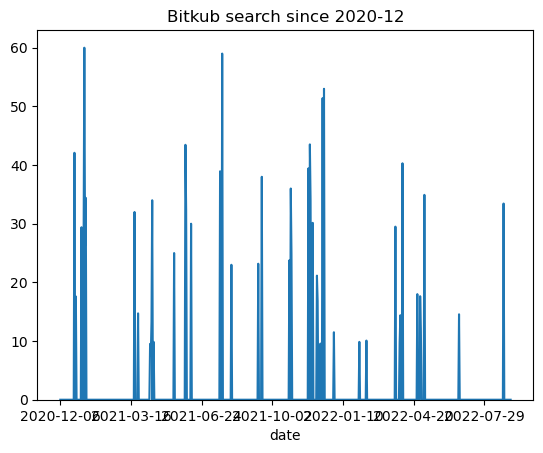

In [17]:
df['bitkub'].plot()
plt.bar(df.index, df['bitkub'])
plt.title('Bitkub search since 2020-12')
#plt.figure(figsize=(25,5))
mpl.rcParams['figure.figsize'] = [45, 10]
plt.show()

In [91]:
# count search == 0
not0 = df.loc[df['bitkub'] != 0]
print('Rows bitkub search != 0 :', len(not0))

# Turn days search to percent
days_search_percent = len(not0)/len(df)
print(f'Rows bitkub search per data rows :{days_search_percent:.4f}')

print('Rows bitkub search == 0 :',len(df.loc[df['bitkub'] == 0]))


Rows bitkub search != 0 : 48
Rows bitkub search per data rows :0.0752
Rows bitkub search == 0 : 590


ข้อมูลไม่มี NA แต่มีข้อมูลเป็น 0 ซึ่งหมายความว่าเมื่อเทียบเป็นสัดส่วนแต่การค้นหาทั้งหมดแล้ว มีการค้นหาน้อยมาก ถึง 590 แถว และมีข้อมูลเพียง 48 แถวที่มีการค้นหามาก

In [20]:
not0.head(5)

,bitkub_unscaled,bitkub_monthly,isPartial,scale,bitkub
date,,,,,
2020-12-26,69,61.0,NaN,0.61,42.09
2020-12-28,80,22.0,NaN,0.22,17.60
2021-01-05,49,60.0,NaN,0.60,29.40
2021-01-08,46,60.0,NaN,0.60,27.60
2021-01-09,100,60.0,NaN,0.60,60.00


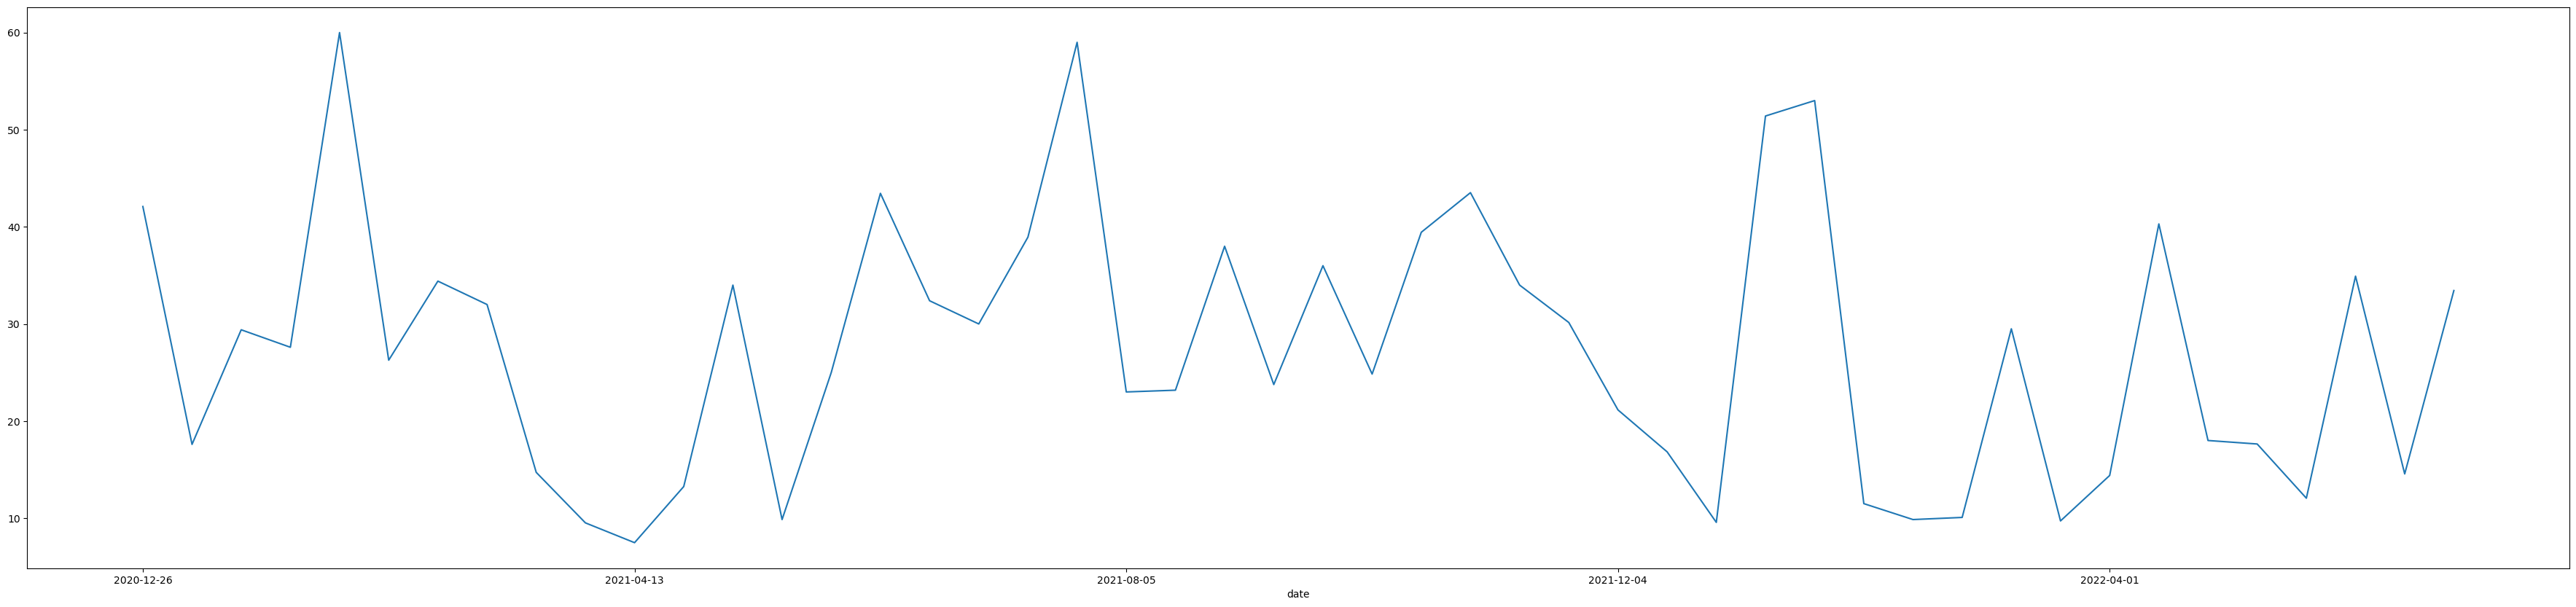

In [21]:
# plot ดูข้อมูลที่ปริมาณการค้นหา เฉพาะวันที่มีการค้นหา
not0['bitkub'].plot()
plt.show()

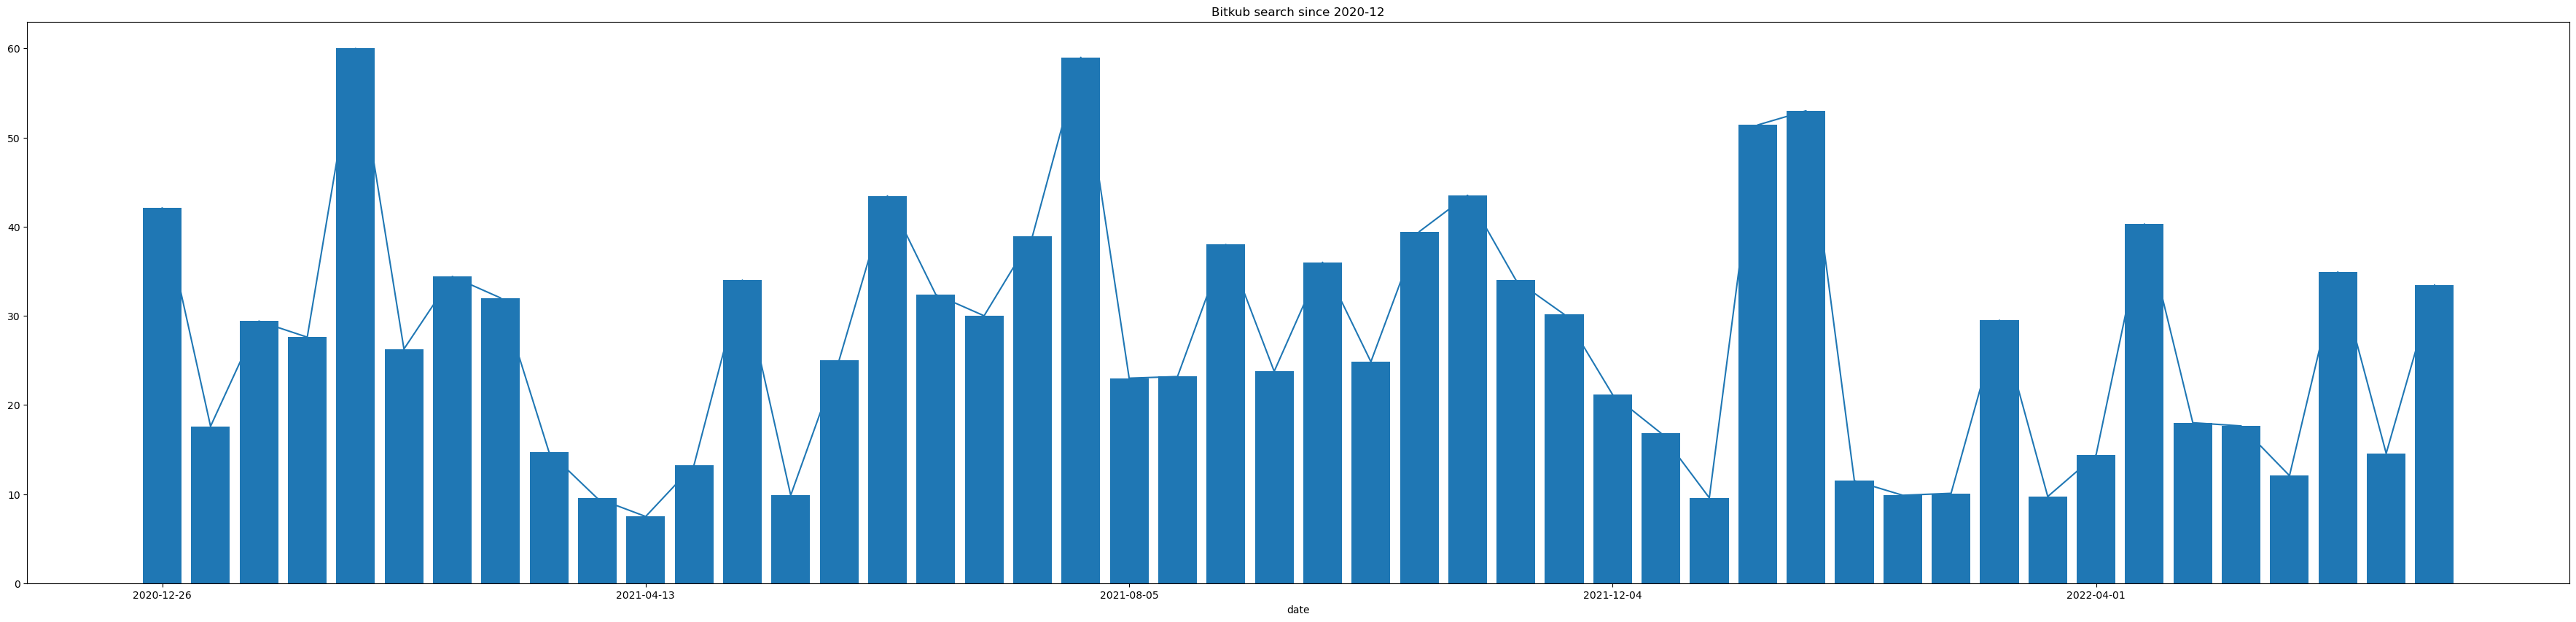

In [22]:
not0['bitkub'].plot()
plt.bar(not0.index, not0['bitkub'])
plt.title('Bitkub search since 2020-12')
plt.show()

#### Prep coins data

In [23]:
eth_binance = df_binance_eth
btc_binance = df_binance_btc
eth_binance.columns

Index(['datetime', 'symbol', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [24]:
new_btc = df_bitkub_btc#.set_index(['datetime'])
new_eth = df_bitkub_eth#.set_index(['datetime'])
new_kub = df_bitkub_kub#.set_index(['datetime'])
new_btc.columns

Index(['datetime', 'symbol', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [25]:
df_bitkub_btc.head(1)

,datetime,symbol,open,high,low,close,volume
0,2018-05-09,BITKUB:BTCTHB,293000.0,300000.0,287000.0,295950.0,2.132158


#### Combine pricing dataframe

In [26]:
# Marge ข้อมูลที่ได้จากตลาด Binance
df_coins_binance = pd.merge(btc_binance, eth_binance, how='left', left_on='datetime', right_on='datetime', suffixes= ['_btc_binance', '_eth_binance'])
df_coins_binance.head()

,datetime,symbol_btc_binance,open_btc_binance,high_btc_binance,low_btc_binance,close_btc_binance,volume_btc_binance,symbol_eth_binance,open_eth_binance,high_eth_binance,low_eth_binance,close_eth_binance,volume_eth_binance
0,2017-08-17 07:00:00,BINANCE:BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,BINANCE:ETHUSDT,301.13,312.18,298.00,302.00,7030.71034
1,2017-08-18 07:00:00,BINANCE:BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,BINANCE:ETHUSDT,302.00,311.79,283.94,293.96,9537.84646
2,2017-08-19 07:00:00,BINANCE:BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,BINANCE:ETHUSDT,293.96,299.90,278.00,290.91,2146.19773
3,2017-08-20 07:00:00,BINANCE:BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,BINANCE:ETHUSDT,290.91,300.53,282.85,299.10,2510.13871
4,2017-08-21 07:00:00,BINANCE:BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,BINANCE:ETHUSDT,299.10,346.52,294.60,323.29,5219.44542


In [27]:
# # Marge ข้อมูลที่ได้จากตลาด Bitkub
df_coins = pd.merge(new_btc, new_eth, how='left', left_on= 'datetime', right_on= 'datetime', suffixes= ['_btc_bitkub', '_eth_bitkub'])
df_coins.head()

,datetime,symbol_btc_bitkub,open_btc_bitkub,high_btc_bitkub,low_btc_bitkub,close_btc_bitkub,volume_btc_bitkub,symbol_eth_bitkub,open_eth_bitkub,high_eth_bitkub,low_eth_bitkub,close_eth_bitkub,volume_eth_bitkub
0,2018-05-09,BITKUB:BTCTHB,293000.0,300000.0,287000.0,295950.0,2.132158,BITKUB:ETHTHB,22500.0,23800.0,21500.0,23700.0,18.387816
1,2018-05-10,BITKUB:BTCTHB,295950.0,299000.0,289351.0,299000.0,0.536473,BITKUB:ETHTHB,23800.0,24000.0,23800.0,24000.0,4.644577
2,2018-05-11,BITKUB:BTCTHB,294005.0,296000.0,270150.0,270150.0,1.889688,BITKUB:ETHTHB,24200.0,24200.0,22150.0,22500.0,8.693208
3,2018-05-12,BITKUB:BTCTHB,270151.0,288253.0,270150.0,280000.0,0.231786,BITKUB:ETHTHB,23000.0,23000.0,21000.0,22250.0,6.635473
4,2018-05-13,BITKUB:BTCTHB,280000.0,288252.0,277000.0,277200.0,1.817175,BITKUB:ETHTHB,22250.0,23200.0,22000.0,23200.0,7.472291


In [28]:
# Merge bitkub with binance data
#df_coins_both = pd.merge(df_coins_binance, df_coins, left_on='datetime', right_on='datetime')
#df_coins_both.head()

ข้อมูล 2 ตลาด มีColumnที่แสดงถึงช่วงเวลา(Datetime) คนละ format กัน จึงยังไม่สามารถนำมารวมกันได้

#### Adjust binance data datetime format

In [29]:
import datetime

In [30]:
df_coins

,datetime,symbol_btc_bitkub,open_btc_bitkub,high_btc_bitkub,low_btc_bitkub,close_btc_bitkub,volume_btc_bitkub,symbol_eth_bitkub,open_eth_bitkub,high_eth_bitkub,low_eth_bitkub,close_eth_bitkub,volume_eth_bitkub
0,2018-05-09,BITKUB:BTCTHB,293000.00,300000.00,287000.00,295950.00,2.132158,BITKUB:ETHTHB,22500.00,23800.00,21500.00,23700.00,18.387816
1,2018-05-10,BITKUB:BTCTHB,295950.00,299000.00,289351.00,299000.00,0.536473,BITKUB:ETHTHB,23800.00,24000.00,23800.00,24000.00,4.644577
2,2018-05-11,BITKUB:BTCTHB,294005.00,296000.00,270150.00,270150.00,1.889688,BITKUB:ETHTHB,24200.00,24200.00,22150.00,22500.00,8.693208
3,2018-05-12,BITKUB:BTCTHB,270151.00,288253.00,270150.00,280000.00,0.231786,BITKUB:ETHTHB,23000.00,23000.00,21000.00,22250.00,6.635473
4,2018-05-13,BITKUB:BTCTHB,280000.00,288252.00,277000.00,277200.00,1.817175,BITKUB:ETHTHB,22250.00,23200.00,22000.00,23200.00,7.472291
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,2022-10-08,BITKUB:BTCTHB,730604.94,738045.00,727605.00,731418.74,69.469531,BITKUB:ETHTHB,49793.88,50196.21,49500.00,49819.62,855.087887
1614,2022-10-09,BITKUB:BTCTHB,731854.38,732850.00,723045.01,730728.57,68.305813,BITKUB:ETHTHB,49840.00,49973.51,49000.00,49692.60,899.807182
1615,2022-10-10,BITKUB:BTCTHB,731494.93,732999.99,724000.00,725100.00,88.753887,BITKUB:ETHTHB,49724.19,50241.28,49110.00,49242.00,1072.780040
1616,2022-10-11,BITKUB:BTCTHB,725999.84,731999.99,717194.00,726539.99,89.960297,BITKUB:ETHTHB,49275.27,49734.59,48300.03,49108.22,1364.960923


In [31]:
#df_coins_binance.head()
binance_time = df_coins_binance['datetime'][0]
bitkub_time = df_coins['datetime'][0]
print('Binance time ',binance_time)
print('type binance time',type(binance_time))
print('Biktub time ',bitkub_time)
print('type bitkub time',type(bitkub_time))



Binance time  2017-08-17 07:00:00
type binance time <class 'str'>
Biktub time  2018-05-09
type bitkub time <class 'str'>


In [32]:
df_coins_binance.reset_index(inplace= True)

In [33]:
df_coins_binance['datetime'] = pd.to_datetime(df_coins_binance['datetime']).dt.date
type(df_coins_binance['datetime'][0])

datetime.date

In [34]:
print('previous datetime', binance_time)
print('new date', df_coins_binance['datetime'][0])

previous datetime 2017-08-17 07:00:00
new date 2017-08-17


In [35]:
df_coins['datetime'] = pd.to_datetime(df_coins['datetime']).dt.date
type(df_coins['datetime'][0])

datetime.date

In [36]:
df_coins_binance.set_index('datetime', inplace= True)
df_coins.set_index('datetime', inplace= True)

หลังจากแปลงข้อมูล Datetime เป็นรูปแบบเดียวกันแล้ว จึงนำมารวมกันได้

In [37]:
df_coins_both = pd.merge(df_coins_binance, df_coins, how= 'inner', left_index=True, right_index= True)
df_coins_both.head(1)
print('rows binance before concat ', len(df_coins_binance))
print('rows bitkub before concat ', len(df_coins))

print('\nrows after concat ', len(df_coins_both))
print('NA row in bitkub data', df_coins_both['volume_btc_bitkub'].isna().sum())


rows binance before concat  1884
rows bitkub before concat  1618

rows after concat  1618
NA row in bitkub data 0


In [38]:
df_coins_both.columns

Index(['index', 'symbol_btc_binance', 'open_btc_binance', 'high_btc_binance',
       'low_btc_binance', 'close_btc_binance', 'volume_btc_binance',
       'symbol_eth_binance', 'open_eth_binance', 'high_eth_binance',
       'low_eth_binance', 'close_eth_binance', 'volume_eth_binance',
       'symbol_btc_bitkub', 'open_btc_bitkub', 'high_btc_bitkub',
       'low_btc_bitkub', 'close_btc_bitkub', 'volume_btc_bitkub',
       'symbol_eth_bitkub', 'open_eth_bitkub', 'high_eth_bitkub',
       'low_eth_bitkub', 'close_eth_bitkub', 'volume_eth_bitkub'],
      dtype='object')

ได้ Dataframe ใหม่ที่มีข้อมูลรวมทุกตลาด

In [39]:
# นำมาจัดเรียงเฉพาะ Column ที่ต้องการใช้
df_coins = df_coins_both[[ 'volume_btc_binance', 'volume_eth_binance', 'volume_btc_bitkub', 'volume_eth_bitkub']]
df_coins

,volume_btc_binance,volume_eth_binance,volume_btc_bitkub,volume_eth_bitkub
datetime,,,,
2018-05-09,25673.524899,112353.37758,2.132158,18.387816
2018-05-10,25055.063718,102019.29933,0.536473,4.644577
2018-05-11,48227.048061,216953.54991,1.889688,8.693208
2018-05-12,40241.320810,166801.07487,0.231786,6.635473
2018-05-13,25632.869362,136022.39207,1.817175,7.472291
...,...,...,...,...
2022-10-08,102480.098420,203391.66120,69.469531,855.087887
2022-10-09,113900.826810,186201.91850,68.305813,899.807182
2022-10-10,212509.098490,393663.01140,88.753887,1072.780040


In [40]:
# เปลี่ยน column datetime ของข้อมูล google trend ให้เป็นรูปแบบเดียวกับราคา
df.reset_index(inplace= True)
df['date'] = pd.to_datetime(df['date']).dt.date
type(df['date'][0])


<ipython-input-40-7a5fe7fa9801>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date']).dt.date


datetime.date

In [41]:
df

,date,bitkub_unscaled,bitkub_monthly,isPartial,scale,bitkub
0,2020-12-06,0,35.0,False,0.35,0.0
1,2020-12-07,0,35.0,NaN,0.35,0.0
2,2020-12-08,0,35.0,NaN,0.35,0.0
3,2020-12-09,0,35.0,NaN,0.35,0.0
4,2020-12-10,0,35.0,NaN,0.35,0.0
...,...,...,...,...,...,...
633,2022-08-31,0,27.0,NaN,0.27,0.0
634,2022-09-01,0,27.0,NaN,0.27,0.0
635,2022-09-02,0,27.0,NaN,0.27,0.0
636,2022-09-03,0,27.0,NaN,0.27,0.0


In [42]:
# นำข้อมูล Google trend และ ข้อมูลของเหรียญ ที่เตรียมไว้มารวมกันตามวันที่
df_joined = pd.merge(df, df_coins, how='left', left_on='date', right_on= 'datetime')
df_joined.rename(columns={'date': 'datetime'}, inplace= True)
df_joined.set_index('datetime', inplace= True)
df_joined

# get only nesscessary column
df_joined_base = df_joined.iloc[:, 4:]
#df_joined_base
df_joined_base.rename(columns={'bitkub': 'googletrend'}, inplace= True)
df_joined_base


,googletrend,volume_btc_binance,volume_eth_binance,volume_btc_bitkub,volume_eth_bitkub
datetime,,,,,
2020-12-06,0.0,37043.091861,602496.96339,145.801752,1692.904166
2020-12-07,0.0,41372.296293,498329.37589,165.108189,1606.013348
2020-12-08,0.0,61626.947614,804443.00717,307.878653,3049.675731
2020-12-09,0.0,79585.553801,997192.16738,638.214088,5347.911585
2020-12-10,0.0,52890.675094,608414.51466,277.778894,1840.982009
...,...,...,...,...,...
2022-08-31,0.0,276946.607650,949227.67750,142.028756,4506.912619
2022-09-01,0.0,245289.945760,728710.48200,115.642678,3859.938572
2022-09-02,0.0,245986.603300,919009.65980,144.389379,3877.928573


#### Processcing

In [44]:
# copy Dataframe ที่เตรียมไว้มาเป็นอันใหม่เหมือนที่จะนำมาจัดการกับข้อมูล และแก้ไขใหม่ได้สดวกขึ้น
df_joined = df_joined_base.copy()

In [45]:
df_joined.head()

,googletrend,volume_btc_binance,volume_eth_binance,volume_btc_bitkub,volume_eth_bitkub
datetime,,,,,
2020-12-06,0.0,37043.091861,602496.96339,145.801752,1692.904166
2020-12-07,0.0,41372.296293,498329.37589,165.108189,1606.013348
2020-12-08,0.0,61626.947614,804443.00717,307.878653,3049.675731
2020-12-09,0.0,79585.553801,997192.16738,638.214088,5347.911585
2020-12-10,0.0,52890.675094,608414.51466,277.778894,1840.982009


นำข้อมูลด้าน ปริมาณการซื้อขายต่อวันมาเปลี่ยนเป็น อัตราการเปลี่ยนแปลงไปจากวันที่ n ต่อวันที่ n+1

In [93]:
# สร้าง list ของชื่อ Column ที่ต้องการเพื่อนำมาคำนวนด้วย for loop
all_col = df_joined_base.columns[1:]

# คำนวนอันตราการเปลี่ยนแปลงแบบ n+1, n+3, n+7 และ shift ข้อมูลกลับมาเป็นวันที่ n เพื่อให้ตรงกับวันที่เกิดการค้นหาใน google 
# เพื่อที่จะได้นำมาเปรียบเทียบว่าวันที่มีการค้นหานั้น ทำให้ปริมาณการซื้อขาย(volume) ในช่วงเวลานั้นมีการเปลี่ยนแปลงหรือไม่
for i in all_col:
    #print(i+'_1d_chg')
    df_joined[i+'_1d_chg'] = df_joined[i].pct_change(1).shift(-1)
    df_joined[i+'_1d_chg'] = df_joined[i+'_1d_chg']#.abs()
    
    df_joined[i+'_3d_chg'] = df_joined[i].pct_change(3).shift(-3)#.abs()
    df_joined[i+'_7d_chg'] = df_joined[i].pct_change(7).shift(-7)#.abs()
df_joined


,googletrend,volume_btc_binance,volume_eth_binance,volume_btc_bitkub,volume_eth_bitkub,volume_btc_binance_1d_chg,volume_btc_binance_3d_chg,volume_btc_binance_7d_chg,volume_eth_binance_1d_chg,volume_eth_binance_3d_chg,volume_eth_binance_7d_chg,volume_btc_bitkub_1d_chg,volume_btc_bitkub_3d_chg,volume_btc_bitkub_7d_chg,volume_eth_bitkub_1d_chg,volume_eth_bitkub_3d_chg,volume_eth_bitkub_7d_chg
datetime,,,,,,,,,,,,,,,,,
2020-12-06,0.0,37043.091861,602496.96339,145.801752,1692.904166,0.116869,1.148459,0.526893,-0.172893,0.655099,0.091781,0.132416,3.377273,1.300042,-0.051326,2.159016,0.328615
2020-12-07,0.0,41372.296293,498329.37589,165.108189,1606.013348,0.489570,0.278408,0.142243,0.614280,0.220908,-0.010670,0.864709,0.682405,0.227157,0.898911,0.146306,0.144307
2020-12-08,0.0,61626.947614,804443.00717,307.878653,3049.675731,0.291408,0.178230,0.003366,0.239606,-0.044156,-0.292342,1.072940,-0.002224,0.014401,0.753600,-0.178782,-0.395132
2020-12-09,0.0,79585.553801,997192.16738,638.214088,5347.911585,-0.335424,-0.377777,0.436270,-0.389872,-0.424470,0.188926,-0.564756,-0.713229,0.093269,-0.655757,-0.743990,-0.022220
2020-12-10,0.0,52890.675094,608414.51466,277.778894,1840.982009,0.372845,0.069391,2.495559,0.263812,0.081162,2.297308,0.105893,0.207256,3.621477,0.360387,0.221749,3.218315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.0,276946.607650,949227.67750,142.028756,4506.912619,-0.114306,-0.470515,NaN,-0.232312,-0.661412,NaN,-0.185780,-0.277007,NaN,-0.143551,-0.363514,NaN
2022-09-01,0.0,245289.945760,728710.48200,115.642678,3859.938572,0.002840,-0.406463,NaN,0.261145,-0.592992,NaN,0.248582,-0.280407,NaN,0.004661,-0.609197,NaN
2022-09-02,0.0,245986.603300,919009.65980,144.389379,3877.928573,-0.403874,NaN,NaN,-0.650279,NaN,NaN,-0.288828,NaN,NaN,-0.260279,NaN,NaN


In [47]:
# ตรวจสอบการคำนวนว่าตรงกับที่ต้องการหรือไม่
print('1d change')
print('Value via pct_change method :', df_joined['volume_btc_binance_1d_chg'][0])
print('Value via calculate method :',(df_joined['volume_btc_binance'][1] - df_joined['volume_btc_binance'][0]) / df_joined['volume_btc_binance'][0])

# 3 days change
print('\n3d change')
print('Value via pct_change method :', df_joined['volume_btc_binance_3d_chg'][0])
print('Value via calculate method :',(df_joined['volume_btc_binance'][3] - df_joined['volume_btc_binance'][0]) / df_joined['volume_btc_binance'][0])

# 7 days change
print('\n7d change')
print('Value via pct_change method :', df_joined['volume_btc_binance_7d_chg'][0])
print('Value via calculate method :',(df_joined['volume_btc_binance'][7] - df_joined['volume_btc_binance'][0]) / df_joined['volume_btc_binance'][0])

1d change
Value via pct_change method : 0.11686941382336147
Value via calculate method : 0.11686941382336137

3d change
Value via pct_change method : 1.1484587220644475
Value via calculate method : 1.1484587220644475

7d change
Value via pct_change method : 0.5268925703134626
Value via calculate method : 0.5268925703134627


In [48]:
df_joined_searched = df_joined.loc[df_joined['googletrend'] != 0]

In [49]:
df_joined_searched.columns

Index(['googletrend', 'volume_btc_binance', 'volume_eth_binance',
       'volume_btc_bitkub', 'volume_eth_bitkub', 'volume_btc_binance_1d_chg',
       'volume_btc_binance_3d_chg', 'volume_btc_binance_7d_chg',
       'volume_eth_binance_1d_chg', 'volume_eth_binance_3d_chg',
       'volume_eth_binance_7d_chg', 'volume_btc_bitkub_1d_chg',
       'volume_btc_bitkub_3d_chg', 'volume_btc_bitkub_7d_chg',
       'volume_eth_bitkub_1d_chg', 'volume_eth_bitkub_3d_chg',
       'volume_eth_bitkub_7d_chg'],
      dtype='object')

In [50]:
#df_joined_searched = df_joined_searched[['googletrend', 'volume_btc_binance_', 'btc_vol_1d_chg']]

In [51]:

# ! Outlier in btc vol change 

In [52]:
#sns.pairplot(df_joined)
#plt.show()

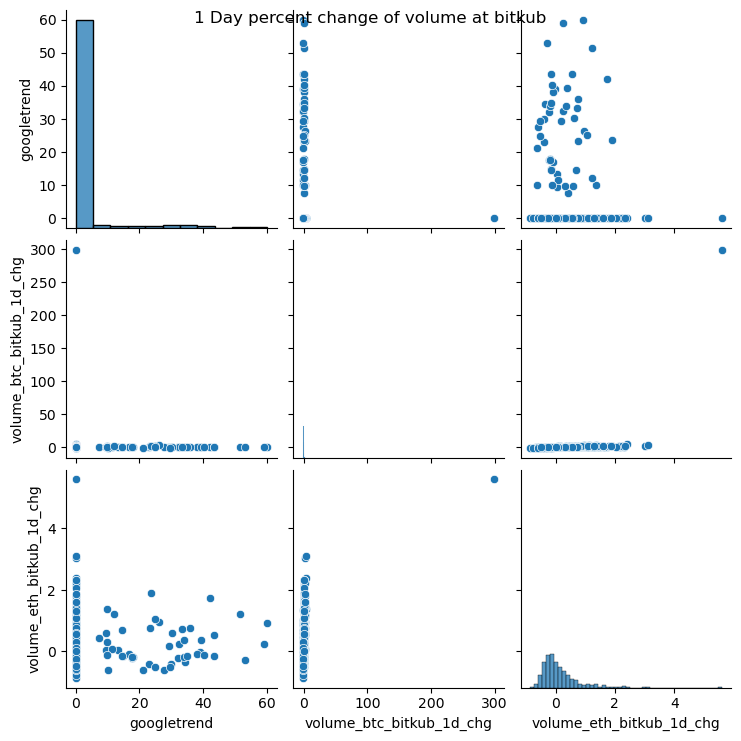

In [97]:
# PLot เพื่อดู %chg ของ Volume เทียบกับ Google trend 
pp = sns.pairplot(df_joined[['googletrend', 'volume_btc_bitkub_1d_chg', 'volume_eth_bitkub_1d_chg']])
pp.fig.suptitle('1 Day percent change of volume at bitkub')

plt.show()

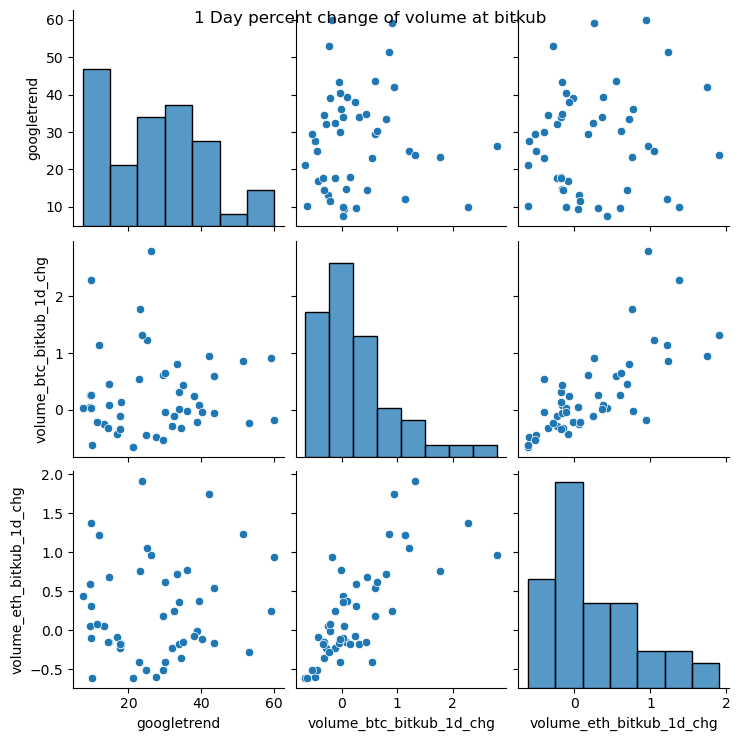

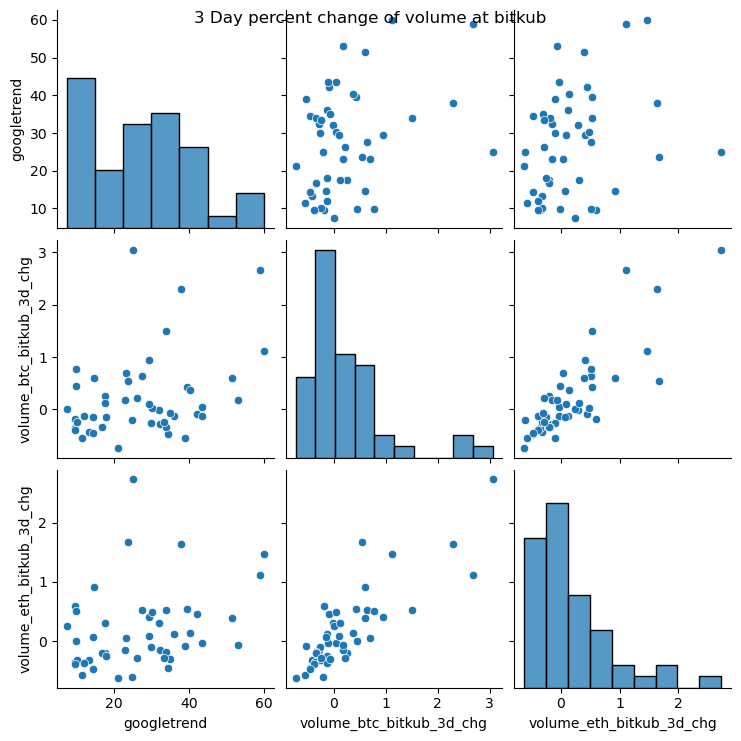

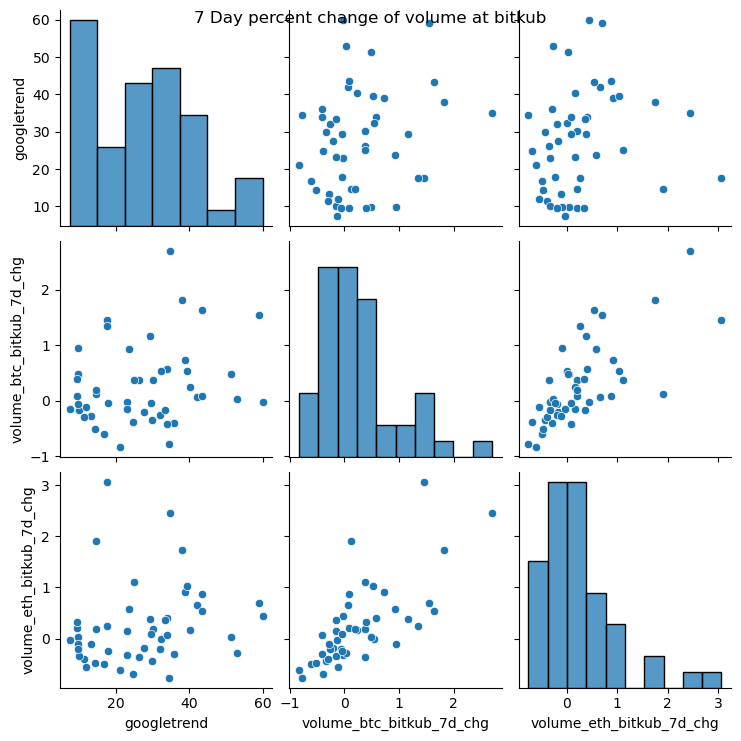

In [94]:
# เปรียบเทียบระหว่่าง %chg ของ Volume แบบ 1,3,7 วัน เทียบกับ Google trend 

pp = sns.pairplot(df_joined_searched[['googletrend', 'volume_btc_bitkub_1d_chg', 'volume_eth_bitkub_1d_chg']])
pp.fig.suptitle('1 Day percent change of volume at bitkub')

pp2 = sns.pairplot(df_joined_searched[['googletrend', 'volume_btc_bitkub_3d_chg', 'volume_eth_bitkub_3d_chg']])
pp2.fig.suptitle('3 Day percent change of volume at bitkub')

pp3 = sns.pairplot(df_joined_searched[['googletrend', 'volume_btc_bitkub_7d_chg', 'volume_eth_bitkub_7d_chg']])
pp3.fig.suptitle('7 Day percent change of volume at bitkub')



plt.show()

ข้อมูลของ Google trend ไม่สามารถอธิบายถึงการเปลี่ยนแปลงของของปริมาณการซื้อขายได้ เพราะแต่ละเหรียญนั้นมีปัจจัยอื่นๆที่ส่งผลต่อปริมาณการซื้อขาย จึงไม่สามารถใช้แทน Daily active users ได้ อย่างีท่คาดการณ์ไว้

In [54]:
df_joined_searched[['googletrend', 'volume_btc_bitkub_1d_chg', 'volume_eth_bitkub_1d_chg']].corr().iloc[0]
#df_joined_searched[['googletrend', 'volume_btc_binance_1d_chg', 'volume_eth_binance_1d_chg']].corr()
#df_joined_searched[['googletrend', 'volume_btc_bitkub_3d_chg', 'volume_eth_bitkub_3d_chg']].corr()
#df_joined_searched[['googletrend', 'volume_btc_bitkub_7d_chg', 'volume_eth_bitkub_7d_chg']].corr()

googletrend                 1.000000
volume_btc_bitkub_1d_chg    0.017134
volume_eth_bitkub_1d_chg    0.101641
Name: googletrend, dtype: float64

ลองใช้การค่าเฉลี่ยของการเปลี่ยนแปลงจากทั้ง2เหรียญตัวอย่าง และนำมาเปรียบเทียบกันตลาด Binance เพื่อลดการเปลี่ยนแปลงของปริมาณการซื้อขายที่เกิดจากปัจจัยอื่นๆของตัวเหรียญ

In [55]:
# สร้าง Dataframe ใหม่ และนำมาหาคาเฉลี่ยการเปลี่ยนแปลงของทั้ง 2 เหรียญ ของวันทั้งหมด
df_mean = pd.DataFrame()
df_mean['googletrend'] = df_joined['googletrend']
df_mean['binance_avg_1d_chg'] = df_joined[['volume_btc_binance_1d_chg', 'volume_eth_binance_1d_chg']].mean(axis=1)
df_mean['bitkub_avg_1d_chg'] = df_joined[['volume_btc_bitkub_1d_chg', 'volume_eth_bitkub_1d_chg']].mean(axis=1)
total_percent = (df_mean['binance_avg_1d_chg'] < df_mean['bitkub_avg_1d_chg']).sum()/len(df_mean)
df_mean.reset_index(inplace= True)

In [56]:
# สร้าง Dataframe ใหม่ และนำมาหาคาเฉลี่ยการเปลี่ยนแปลงของทั้ง 2 เหรียญ เฉพาะวันที่การค้นหาเป็น 0
df_mean_no_searched = pd.DataFrame()
df_mean_no_searched = df_joined.loc[(df_joined['googletrend'] == 0)]
df_mean_no_searched['binance_avg_1d_chg'] = df_mean_no_searched[['volume_btc_binance_1d_chg', 'volume_eth_binance_1d_chg']].mean(axis=1)
df_mean_no_searched['bitkub_avg_1d_chg'] = df_mean_no_searched[['volume_btc_bitkub_1d_chg', 'volume_eth_bitkub_1d_chg']].mean(axis=1)
no_search_percent = (df_mean_no_searched['binance_avg_1d_chg'] < df_mean_no_searched['bitkub_avg_1d_chg']).sum()/len(df_mean)

<ipython-input-56-0d3257429621>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean_no_searched['binance_avg_1d_chg'] = df_mean_no_searched[['volume_btc_binance_1d_chg', 'volume_eth_binance_1d_chg']].mean(axis=1)
<ipython-input-56-0d3257429621>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean_no_searched['bitkub_avg_1d_chg'] = df_mean_no_searched[['volume_btc_bitkub_1d_chg', 'volume_eth_bitkub_1d_chg']].mean(axis=1)


In [57]:
# สร้าง Dataframe ใหม่ และนำมาหาคาเฉลี่ยการเปลี่ยนแปลงของทั้ง 2 เหรียญ ของวันทั้งหมด เฉพาะวันที่มีการค้นหา
df_mean_searched = pd.DataFrame()
df_mean_searched['googletrend'] = df_joined_searched['googletrend']
df_mean_searched['binance_avg_1d_chg'] = df_joined_searched[['volume_btc_binance_1d_chg', 'volume_eth_binance_1d_chg']].mean(axis=1)
df_mean_searched['bitkub_avg_1d_chg'] = df_joined_searched[['volume_btc_bitkub_1d_chg', 'volume_eth_bitkub_1d_chg']].mean(axis=1)
df_mean_searched['excess_avg_1d_chg'] = df_mean_searched['bitkub_avg_1d_chg'] - df_mean_searched['binance_avg_1d_chg']

search_percent = (df_mean_searched['binance_avg_1d_chg'] < df_mean_searched['bitkub_avg_1d_chg']).sum()/len(df_mean_searched)

In [61]:
df_mean_searched.reset_index(inplace=True)

In [84]:
# mpl.rcParams['figure.figsize'] = [15, 5]
# plt.figure()
# plt.bar(df_mean_searched.index, df_mean_searched['googletrend'], label='Googletrend')#, kind='bar')
# #plt.plot(df_mean_searched.index, df_mean_searched['bitkub_avg_1d_chg'], color='g')#, lebel= 'vol_btc_1d_chg')
# plt.bar(df_mean_searched.index, df_mean_searched['bitkub_avg_1d_chg'], color='g')#, lebel= 'vol_btc_1d_chg')
# plt.bar(df_mean_searched.index, df_mean_searched['binance_avg_1d_chg'], color='r')#, lebel= 'vol_btc_1d_chg')
# #plt.plot(df_mean_searched.index, df_mean_searched['volume_eth_bitkub_1d_chg'], color='r')#, lebel= 'vol_eth_1d_chg')

# plt.ylim(0,20)
# #plt.Line2D(df_joined[])
# #df_joined['googletrend'].plot()
# plt.legend()
# plt.show()


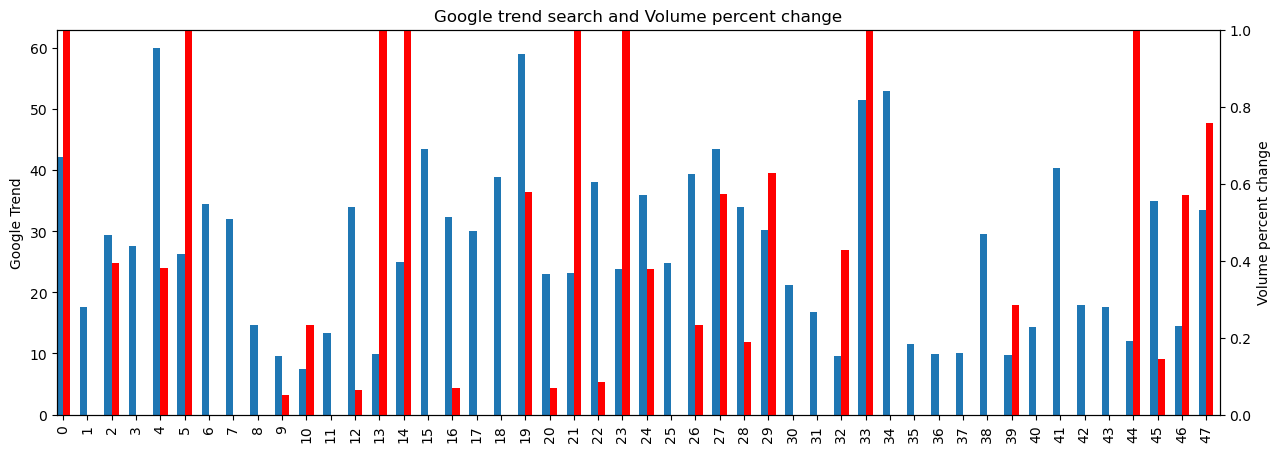

In [99]:
# Plot ดูค่าเฉลี่ยของการเปลี่ยนแปลงปริมาณของทั้ง2เหรียญ 
width = 0.3


mpl.rcParams['figure.figsize'] = [15, 5]




fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.bar(df_mean_searched['datetime'], df_mean_searched['googletrend'], color= 'blue', position=1)#, kin)
ax2 = ax1.twinx()
#ax2.bar(df_mean_searched['datetime'], df_mean_searched['bitkub_avg_1d_chg'], color= 'green', position=0)
#ax2.set_ylabel('Average Volume % Change ')
ax2.set_ylim(0)

df_mean_searched.googletrend.plot(kind= 'bar', ax= ax1, width= width, position=1)
df_mean_searched.bitkub_avg_1d_chg.plot(kind= 'bar', color= 'r', ax= ax2, width= width, position=0)

ax1.set_title('Google trend search and Volume percent change')


ax1.set_ylabel('Google Trend')
ax2.set_ylabel('Volume percent change')

#plt.legend(numpoints=1)
#ax1.legend('Google Trend')
#ax2.legend('% Volume Change')
#plt.legend(numpoints=0)
plt.show()

จากรูปยังไม่ได้คำตอบที่แน่ชัด เพราะมีทั้งวันที่มีการค้นหามากและปริมาณการซื้อขายเพิ่มขึ้นมาก แต่ยังมีวันที่มีการค้นหามาก แต่ปริมาณการซื้อขายไม่ได้เพิ่มขึ้น

Percent of days volume change at bitkub > volume change at binance :0.4875
Percent of days volume change at bitkub > volume change at binance (Search == 0) :0.4357
Percent of days volume change at bitkub > volume change at binance (Search != 0) :0.6875


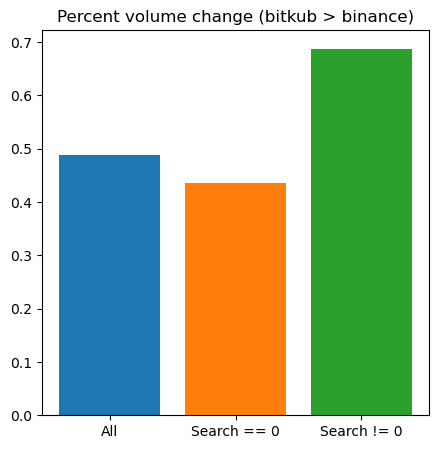

In [108]:
# ดูสัดส่วนว่าในวันทั้งหมด, วันที่มีการค้นหา, วันที่ไม่มีการค้นหา มีอัตราส่วนเท่าไหร่ ที่ปริมาณการซื้อขายใน Bitkub เปลี่ยนแปลงเพิ่มขึ้นมากกว่า ปริมาณการซื้อขายใน Binance
print(f'Percent of days volume change at bitkub > volume change at binance :{total_percent:.4f}')
print(f'Percent of days volume change at bitkub > volume change at binance (Search == 0) :{no_search_percent:.4f}')
print(f'Percent of days volume change at bitkub > volume change at binance (Search != 0) :{search_percent:.4f}')

mpl.rcParams['figure.figsize'] = [5, 5]
plt.title('Percent volume change (bitkub > binance)')
plt.bar('All' ,total_percent)
plt.bar('Search == 0',no_search_percent)
plt.bar('Search != 0', search_percent)
#plt.legend('')
plt.show()

สรุปได้ว่าถึงแม้การเปลี่ยนแปลงของปริมาณการซื้อขาย จะไม่มีความผันแปรต่อยอดการค้นหาเลย "แต่เมื่อดูจากกราฟด้านบน ในวันที่มีการค้นหาใน Google การเปลี่ยนแปลงของปริมาณการซื้อขายเฉลี่ยของทั้ง 2 เหรียญในตลาด Bitkub สูงกว่า ตลาด Binance ถึง 68.75% ของวันทั้งหมดที่มีการค้นหา
แต่ในวันที่ไม่มีการค้นหาใน Google นั้น สูงกว่าเพียงแค่ 43.57% ของวันทั้งหมดที่ไม่มีการค้นหา

In [ ]:
# mpl.rcParams['figure.figsize'] = [15, 5]




# fig, ax1 = plt.subplots()

# ax1.bar(df_mean_searched['datetime'], df_mean_searched['googletrend'], color= 'blue')#, kin)
# ax2 = ax1.twinx()
# ax2.plot(df_mean_searched['datetime'], df_mean_searched['bitkub_avg_1d_chg'], color= 'green')
# ax2.set_ylabel('Average Volume % Change ')

# plt.show()



In [71]:
# df_mean = df_mean.loc[df_mean['bitkub_avg_1d_chg'] < 10]

In [85]:

# mpl.rcParams['figure.figsize'] = [15, 5]

# fig, ax1 = plt.subplots()

# ax1.bar(df_mean['datetime'], df_mean['googletrend'], color= 'blue', width= 1, alpha=0.5)#, kin)
# ax2 = ax1.twinx()
# ax2.plot(df_mean['datetime'], df_mean['bitkub_avg_1d_chg'], color= 'r', alpha= 0.5, linewidth= 1)
# ax2.set_ylabel('Average Volume % Change ')

# ax2.set_ylim(0)

# plt.show()


In [80]:
# mpl.rcParams['figure.figsize'] = [20, 10]
# plt.figure()
# plt.bar(df_joined.index, df_joined['googletrend'],width=1.5, label='Googletrend')#, kind='bar')
# plt.plot(df_joined.index, df_joined['volume_btc_bitkub_1d_chg'], color='g')#, lebel= 'vol_btc_1d_chg')
# plt.plot(df_joined.index, df_joined['volume_eth_bitkub_1d_chg'], color='r')#, lebel= 'vol_eth_1d_chg')

# plt.ylim(0,5)
# #plt.Line2D(df_joined[])
# #df_joined['googletrend'].plot()
# plt.legend()
# plt.show()


In [81]:
# mpl.rcParams['figure.figsize'] = [20, 10]
# plt.figure()
# plt.bar(df_joined_searched.index, df_joined_searched['googletrend'],width=1.5, label='Googletrend')#, kind='bar')
# plt.plot(df_joined_searched.index, df_joined_searched['volume_btc_bitkub_1d_chg'], color='g')#, lebel= 'vol_btc_1d_chg')
# plt.plot(df_joined_searched.index, df_joined_searched['volume_eth_bitkub_1d_chg'], color='r')#, lebel= 'vol_eth_1d_chg')

# plt.ylim(0,5)
# #plt.Line2D(df_joined[])
# #df_joined['googletrend'].plot()
# plt.legend()
# plt.show()

In [82]:
# df_ret_vol = pd.DataFrame()
# df_ret_vol['vol_chg'] = df_binance_btc['volume'].pct_change(1).abs()
# df_ret_vol['close_chg'] = df_binance_btc['close'].pct_change(1)#.shift(-1)

# df_ret_vol.corr()

In [86]:
# df_joined_searched[['volume_btc_binance_1d_chg', 'volume_eth_binance_1d_chg', 'volume_btc_bitkub_1d_chg', 'volume_eth_bitkub_1d_chg']].corr()

In [42]:
# plot % chg and searching demand
# 1 include no search days
#sns.heatmap(df_joined_searched[['googletrend', 'btc_close_1d_chg']])
#sns.heatmap(df_joined_searched)
#mpl.rcParams['figure.figsize'] = [10, 10]
#plt.show()
# 2 only search days